In [1]:
# importing modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.signal import find_peaks
import math

In [2]:
# Loading the dataset
!wget http://www.randomservices.org/random/data/HorseKicks.txt -O HorseKicks.txt
data = pd.read_csv('HorseKicks.txt', sep="\t", index_col='Year')
print(data)

--2020-11-05 00:22:24--  http://www.randomservices.org/random/data/HorseKicks.txt
Resolving www.randomservices.org (www.randomservices.org)... 66.96.149.1
Connecting to www.randomservices.org (www.randomservices.org)|66.96.149.1|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 711 [text/plain]
Saving to: ‘HorseKicks.txt’

HorseKicks.txt      100%[===================>]     711  --.-KB/s    in 0s      

2020-11-05 00:22:25 (56.9 MB/s) - ‘HorseKicks.txt’ saved [711/711]

      GC  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C14  C15
Year                                                            
1875   0   0   0   0   0   0   0   1   1   0    0    0    1    0
1876   2   0   0   0   1   0   0   0   0   0    0    0    1    1
1877   2   0   0   0   0   0   1   1   0   0    1    0    2    0
1878   1   2   2   1   1   0   0   0   0   0    1    0    1    0
1879   0   0   0   1   1   2   2   0   1   0    0    2    1    0
1880   0   3   2   1   1   1   0   0   0   2    

In [3]:
# training set
X = data[0:13]
print(X)

      GC  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C14  C15
Year                                                            
1875   0   0   0   0   0   0   0   1   1   0    0    0    1    0
1876   2   0   0   0   1   0   0   0   0   0    0    0    1    1
1877   2   0   0   0   0   0   1   1   0   0    1    0    2    0
1878   1   2   2   1   1   0   0   0   0   0    1    0    1    0
1879   0   0   0   1   1   2   2   0   1   0    0    2    1    0
1880   0   3   2   1   1   1   0   0   0   2    1    4    3    0
1881   1   0   0   2   1   0   0   1   0   1    0    0    0    0
1882   1   2   0   0   0   0   1   0   1   1    2    1    4    1
1883   0   0   1   2   0   1   2   1   0   1    0    3    0    0
1884   3   0   1   0   0   0   0   1   0   0    2    0    1    1
1885   0   0   0   0   0   0   1   0   0   2    0    1    0    1
1886   2   1   0   0   1   1   1   0   0   1    0    1    3    0
1887   1   1   2   1   0   0   3   2   1   1    0    1    2    0


In [4]:
# testing set
Y = data[13:]
print(Y)

      GC  C1  C2  C3  C4  C5  C6  C7  C8  C9  C10  C11  C14  C15
Year                                                            
1888   0   1   1   0   0   1   1   0   0   0    0    1    1    0
1889   0   0   1   1   0   1   1   0   0   1    2    2    0    2
1890   1   2   0   2   0   1   1   2   0   2    1    1    2    2
1891   0   0   0   1   1   1   0   1   1   0    3    3    1    0
1892   1   3   2   0   1   1   3   0   1   1    0    1    1    0
1893   0   1   0   0   0   1   0   2   0   0    1    3    0    0
1894   1   0   0   0   0   0   0   0   1   0    1    1    0    0


In [5]:
# prediction value for ML estimate
ml_pred = np.mean(X, axis = 0)
print(ml_pred)

GC     1.000000
C1     0.692308
C2     0.615385
C3     0.615385
C4     0.461538
C5     0.384615
C6     0.846154
C7     0.538462
C8     0.307692
C9     0.692308
C10    0.538462
C11    1.000000
C14    1.461538
C15    0.307692
dtype: float64


In [6]:
# RMSE for ML Estimate
ml_RMSE = np.sqrt(np.mean((ml_pred-Y)**2))
print(ml_RMSE)

GC     0.755929
C1     1.112444
C2     0.729756
C3     0.729756
C4     0.484764
C5     0.587989
C6     0.989804
C7     0.898011
C8     0.509421
C9     0.738393
C10    1.159692
C11    1.133893
C14    1.023808
C15    0.941214
dtype: float64


In [7]:
#prediction for MAP estimate
alpha = 1.1
beta = 1.2
map_pred = (np.sum(X,axis=0)+(alpha-1))/(len(X)+beta)
print(map_pred)

GC     0.922535
C1     0.640845
C2     0.570423
C3     0.570423
C4     0.429577
C5     0.359155
C6     0.781690
C7     0.500000
C8     0.288732
C9     0.640845
C10    0.500000
C11    0.922535
C14    1.345070
C15    0.288732
dtype: float64


In [8]:
# RMSE for MAP Estimate
map_RMSE = np.sqrt(np.mean((map_pred-Y)**2))
print(map_RMSE)

GC     0.699213
C1     1.127763
C2     0.728432
C3     0.728432
C4     0.474108
C5     0.608639
C6     0.992615
C7     0.906327
C8     0.514250
C9     0.731731
C10    1.180194
C11    1.184221
C14    0.942171
C15    0.946701
dtype: float64


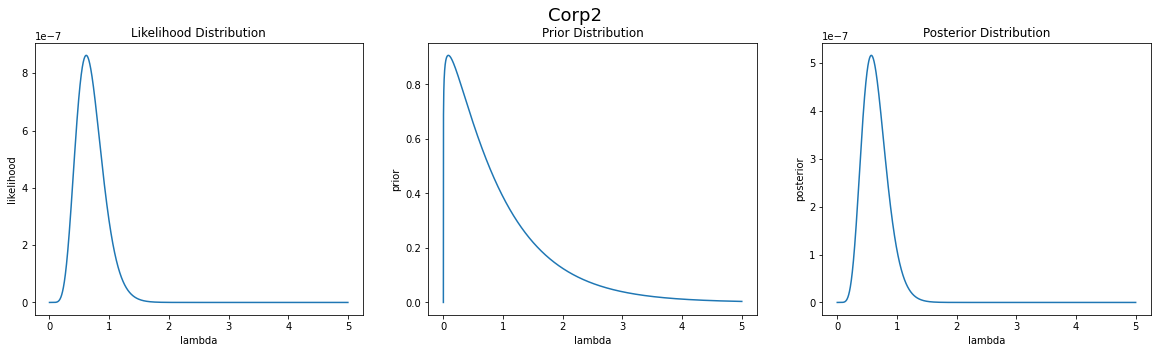

In [9]:
# plot for Corp2
x = np.arange(0,5,0.001)

ml_corp2 = np.power(x,8)*np.exp(-13*x)/8
prior_corp2 = gamma.pdf(x,alpha,scale = 1/beta)
map_corp2 = ml_corp2*prior_corp2

f, ax = plt.subplots(1, 3)
f.set_size_inches(20, 5)
f.suptitle("Corp2",fontsize = 18)

ax[0].set_title("Likelihood Distribution",fontsize = 12)
ax[0].plot(x,ml_corp2)
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('likelihood')

ax[1].set_title("Prior Distribution",fontsize = 12)
ax[1].plot(x,prior_corp2)
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('prior')

ax[2].set_title("Posterior Distribution",fontsize = 12)
ax[2].plot(x,map_corp2)
ax[2].set_xlabel('lambda')
ax[2].set_ylabel('posterior')

f.savefig('Corp2.png')

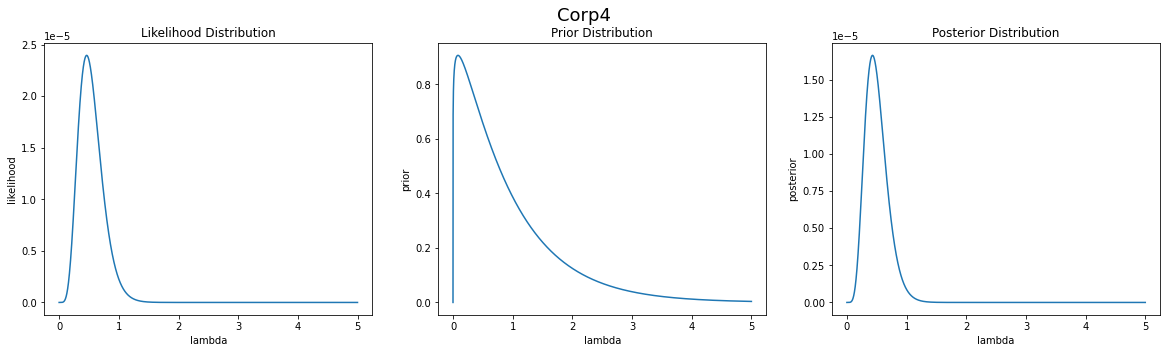

In [10]:
# Plot for Corp4
x = np.arange(0,5,0.001)

ml_corp4 = np.power(x,6)*np.exp(-13*x)
prior_corp4 = gamma.pdf(x,alpha,scale = 1/beta)
map_corp4 = ml_corp4*prior_corp4

f, ax = plt.subplots(1, 3)
f.set_size_inches(20, 5)
f.suptitle("Corp4",fontsize = 18)

ax[0].set_title("Likelihood Distribution",fontsize = 12)
ax[0].plot(x,ml_corp4)
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('likelihood')

ax[1].set_title("Prior Distribution",fontsize = 12)
ax[1].plot(x,prior_corp4)
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('prior')

ax[2].set_title("Posterior Distribution",fontsize = 12)
ax[2].plot(x,map_corp4)
ax[2].set_xlabel('lambda')
ax[2].set_ylabel('posterior')

f.savefig('Corp4.png')

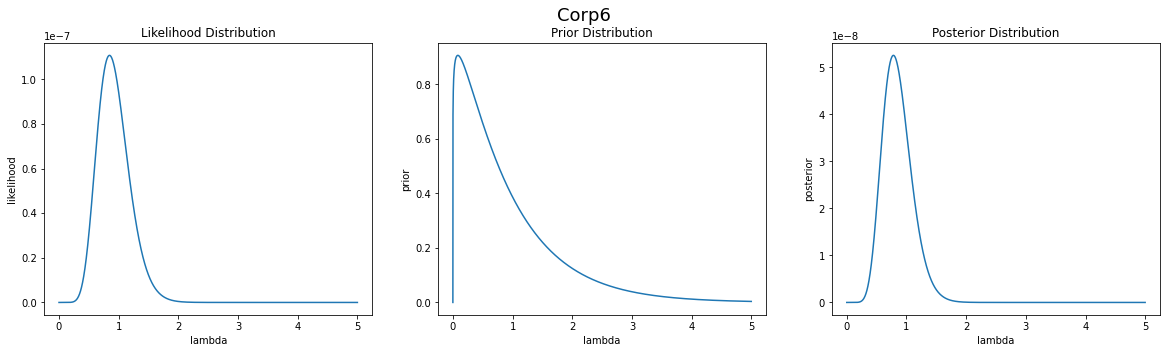

In [11]:
# Plot for Corp6
x = np.arange(0,5,0.001)

ml_corp6 = np.power(x,11)*np.exp(-13*x)/24
prior_corp6 = gamma.pdf(x,alpha,scale = 1/beta)
map_corp6 = ml_corp6*prior_corp6

f, ax = plt.subplots(1, 3)
f.set_size_inches(20, 5)
f.suptitle("Corp6",fontsize = 18)

ax[0].set_title("Likelihood Distribution",fontsize = 12)
ax[0].plot(x,ml_corp6)
ax[0].set_xlabel('lambda')
ax[0].set_ylabel('likelihood')

ax[1].set_title("Prior Distribution",fontsize = 12)
ax[1].plot(x,prior_corp6)
ax[1].set_xlabel('lambda')
ax[1].set_ylabel('prior')

ax[2].set_title("Posterior Distribution",fontsize = 12)
ax[2].plot(x,map_corp6)
ax[2].set_xlabel('lambda')
ax[2].set_ylabel('posterior')

f.savefig('Corp6.png')